In [1]:
## MEDICAL COST PEROSNAL INSURANCE PROJECT

In [3]:
## IMPORTING LIBRARIES

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

In [5]:
from xgboost import XGBRegressor

In [6]:
## Data import from Github

In [7]:
df = pd.read_csv("C:\\Users\\annuy\\Desktop\\medical_cost_insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [8]:
df.shape

(1338, 7)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [10]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [11]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [12]:
df.drop_duplicates(inplace = True)o
df.shape

(1337, 7)

In [13]:
## As per analysis we can see that there is no null value and 1337 rows and 7 coloumns.
## We can see that SD in Age and BMI are large(skewed)

In [14]:
## We can see that there is 3 Categorical column: (Sex,Smoker and Region)
## Now we will encoded these column
##  we will using get_dummies for this 

In [15]:
categorical_columns = ['sex','smoker','region']
df1 = pd.get_dummies(df[categorical_columns],drop_first=True)
df1

,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,0,1,0,0,1
1,1,0,0,1,0
2,1,0,0,1,0
3,1,0,1,0,0
4,1,0,1,0,0
...,...,...,...,...,...
1333,1,0,1,0,0
1334,0,0,0,0,0
1335,0,0,0,1,0
1336,0,0,0,0,1


In [16]:
df = df.join(df1)
df

,age,sex,bmi,children,smoker,region,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,0,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0,0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0,0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0,1,0,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1,0,1,0,0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,0,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0,1,0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0,0,1


In [17]:
df.drop(columns = categorical_columns,axis=1,inplace = True)
df

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1,0,0
1334,18,31.920,0,2205.98080,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,0,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,0,1


In [18]:
## Now we can visualize the data

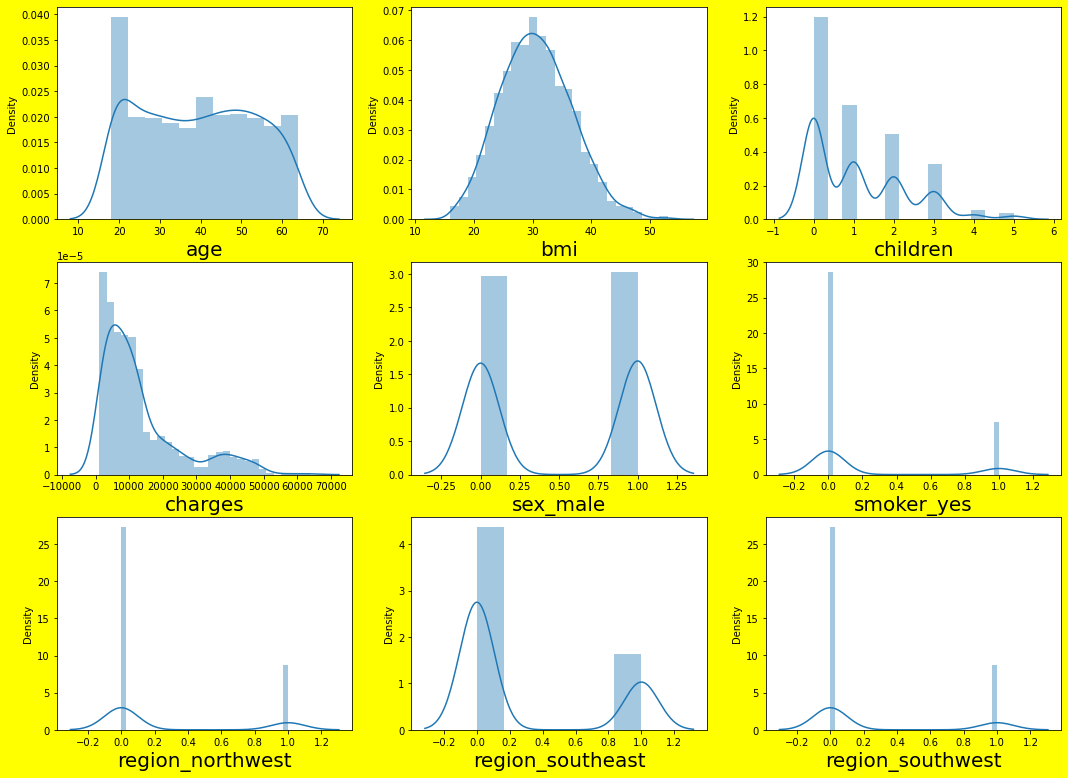

In [20]:
plt.figure(figsize=(18,18),facecolor='yellow')
plotnumber=1

for column in df:
    if plotnumber <=12:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [21]:
## As per upper dataset its not seems to be skewed, so we will check the correlation thru heatmap

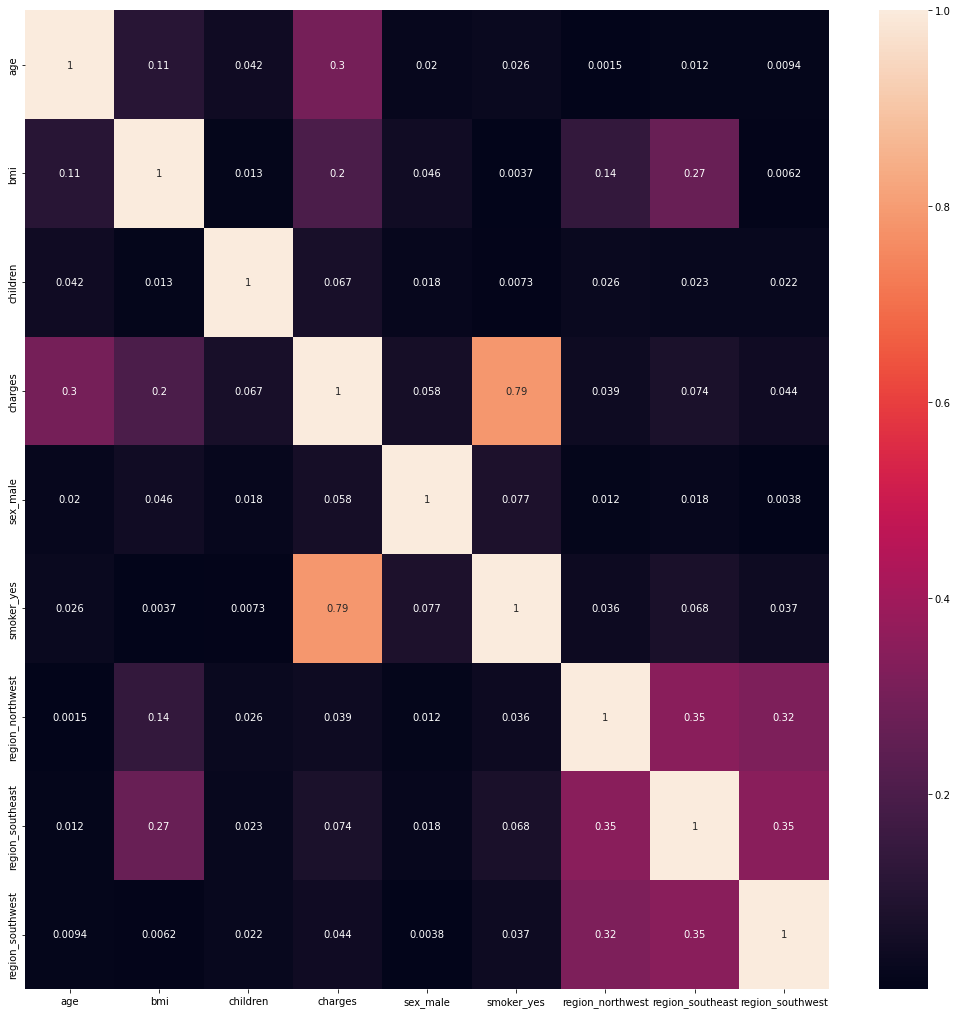

In [22]:
df_corr = df.corr().abs()

plt.figure(figsize=(18,18))
sns.heatmap(df_corr,annot = True)
plt.show()

In [23]:
## We can see that Smoking have a high Correlation with Charges.
## Now we will seperate the target and feature columns

In [24]:
x = df.drop(columns = ['charges'])
y = df.charges

In [25]:
x

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,1,0,0,1
1,18,33.770,1,1,0,0,1,0
2,28,33.000,3,1,0,0,1,0
3,33,22.705,0,1,0,1,0,0
4,32,28.880,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...
1333,50,30.970,3,1,0,1,0,0
1334,18,31.920,0,0,0,0,0,0
1335,18,36.850,0,0,0,0,1,0
1336,21,25.800,0,0,0,0,0,1


In [26]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1337, dtype: float64

In [27]:
## See the again relation with Target using Scatter Plot

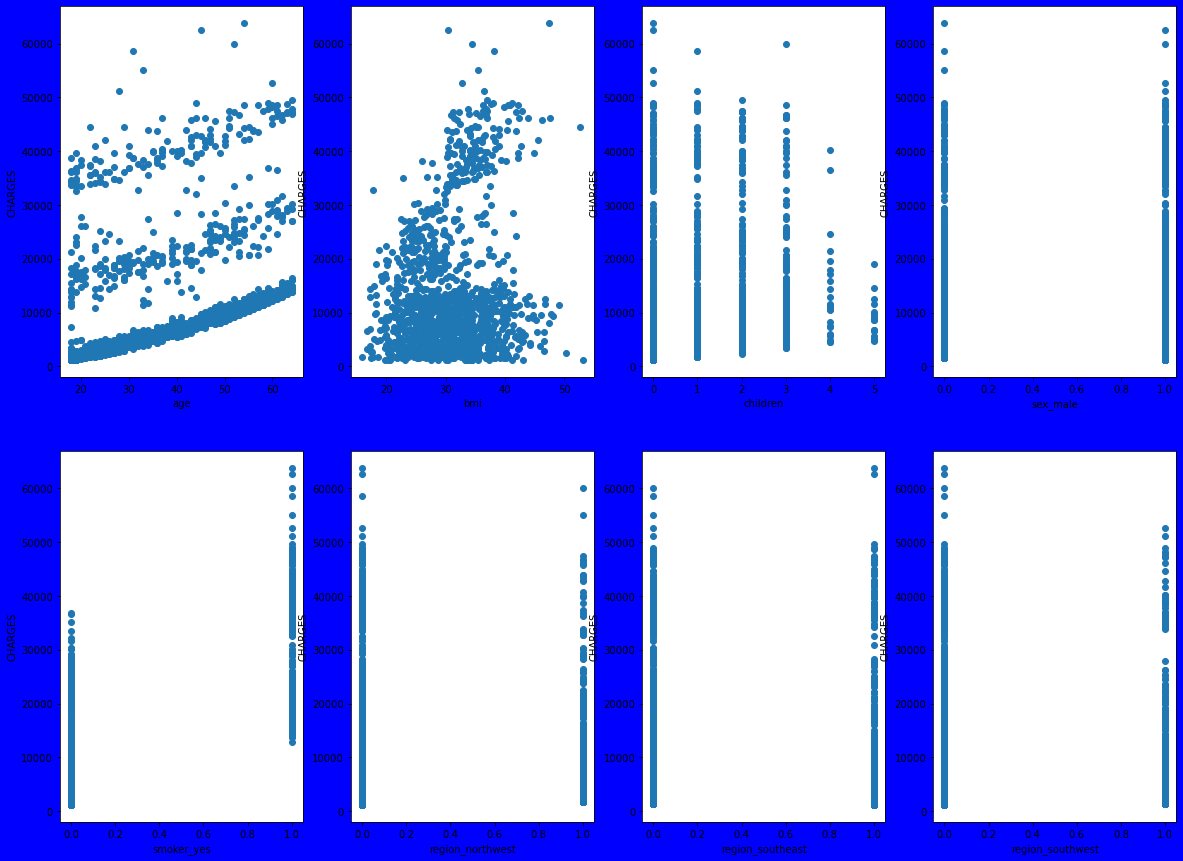

In [28]:
plt.figure(figsize=(20,15),facecolor='blue')
plotnumber=1

for column in x:
    if plotnumber <=8:
        ax=plt.subplot(2,4,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=10)
        plt.ylabel('CHARGES',fontsize=10)
    plotnumber+=1
plt.show()

In [29]:
## No need to drop any column.
## Now we will scale our feature columns

In [30]:
scalar = StandardScaler()
x_scaled = scalar.fit_transform(x)
x_scaled

array([[-1.44041773, -0.45315959, -0.90923416, ..., -0.5655458 ,
        -0.61163774,  1.76460935],
       [-1.51164747,  0.50942165, -0.07944162, ..., -0.5655458 ,
         1.63495472, -0.56669767],
       [-0.79935006,  0.3831546 ,  1.58014347, ..., -0.5655458 ,
         1.63495472, -0.56669767],
       ...,
       [-1.51164747,  1.01448983, -0.90923416, ..., -0.5655458 ,
         1.63495472, -0.56669767],
       [-1.29795825, -0.79752426, -0.90923416, ..., -0.5655458 ,
        -0.61163774,  1.76460935],
       [ 1.55123139, -0.26129928, -0.90923416, ...,  1.76820338,
        -0.61163774, -0.56669767]])

In [31]:
## Now we can do the Model Training and testing

In [32]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.2,random_state=69)

In [33]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [35]:
def metric_score(clf,x_train,x_test,y_train,y_test,train = True):
    if train:
        y_pred = clf.predict(x_train)
        print('\n ======TRAINING RESULT======')
        print(f'Accuracy Score: {r2_score(y_train,y_pred)*100:.2f}%')
        
    elif train == False:
        pred = clf.predict(x_test)
        print('\n ======TESTING RESULT======')
        print(f'Accuracy Score: {r2_score(y_test,pred)*100:.2f}%')
        print('Cross Validation Score = ',cross_val_score(clf,x_scaled,y,cv=5).mean())
        print('MAE = ',mean_absolute_error(y_test,pred))
        print('MSE = ',mean_squared_error(y_test,pred))
        print('RMSE = ',np.sqrt(mean_squared_error(y_test,pred)))

In [36]:
metric_score(lr,x_train,x_test,y_train,y_test,train = True)
metric_score(lr,x_train,x_test,y_train,y_test,train = False)


 ======TRAINING RESULT======
Accuracy Score: 76.08%

 ======TESTING RESULT======
Accuracy Score: 71.24%
Cross Validation Score =  0.7467384760760102
MAE =  4512.776080731104
MSE =  45139747.01846493
RMSE =  6718.61198600313


In [37]:
## We are getting training accuracy of 76.08% and Testing accuracy of 71.2% with Linear Regression model

## We should now test the data on other models as well to check which model is giving us the best result

In [38]:
knn = KNeighborsRegressor()
dec = DecisionTreeRegressor()
ran = RandomForestRegressor()
xgb = XGBRegressor()

In [39]:
#TRAINING THE MODELS
knn.fit(x_train,y_train)
dec.fit(x_train,y_train)
ran.fit(x_train,y_train)
xgb.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [40]:
print(lr.score(x_test,y_test))
print(knn.score(x_test,y_test))
print(dec.score(x_test,y_test))
print(ran.score(x_test,y_test))
print(xgb.score(x_test,y_test))

0.7123621895847683
0.7651988093723373
0.7054465167689838
0.8186654765879757
0.8053960494441192


In [41]:
## Test Accuracy for other Model

In [42]:
## From above accuracies we can note:

## Random Forest and XGB are giving us the best accuracies.
## KNN is also giving decent accuracy.
## Linear Regression and Decision Tree are giving the lowest accuracy amongst the lot.
## Now we need to check for overfitting

## I'll be using Ridge regularization for this

In [43]:
from sklearn.linear_model import Ridge, RidgeCV

In [44]:
ridgecv = RidgeCV(alphas = np.arange(0.001,0.1,0.01),normalize=True)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [45]:
ridgecv.alpha_

0.001

In [46]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.001)

In [47]:
ridge_model.score(x_test,y_test)

0.7123622000260256

In [ ]:
## We can conclude the model is not overfitting as it is giving very similar score to Linear Regression R2 Score.